<span style="color:grey">Author:</span>
<span style="color:yellow">Guillem Borràs</span>

<span style="color:grey">Github</span>: @guiillem_10

<span style="color:grey">Linkedin</span>: https://www.linkedin.com/in/guillem-borras/




# 1. Data download and Analysis

## 1.1 Preliminar exploratory Analysis

In [12]:
%load_ext autoreload
%autoreload 2
from utils import download_analyze_with_metrics, plot_prices, plot_returns, fit_models_from_panel, plot_hist_stdres_garch, plot_hist_with_pdf_normal_t, plot_hist_with_spline, plot_hist_with_kde

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


First of all, we show how to download data from Yahoo Finance, by using the `yfinance` library,using the implemented function `download_and_analyze` in utils.py. This function also cleans the data and prvides us some important metrics of our time series of stocks.

We do also implement an authomatic commentary section that analyses the time series and generate a financial comment on it, making it the first one done ever.

In [13]:
panel, summary, extras, auto_comment = download_analyze_with_metrics(
    tickers=['AAPL','MSFT','GOOGL','AMZN', 'META'],
    start_date='2013-01-01',
    benchmark='^GSPC',
    rf_annual=0.02,
    winsorize_returns=(0.01, 0.99)  # optional
)

c:\Users\guilb\Desktop\github_portfolio\utils.py:277: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  panel = px.stack(dropna=False).rename("price").to_frame()
c:\Users\guilb\Desktop\github_portfolio\utils.py:278: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  panel["return"] = rets.stack(dropna=False)


In [14]:
panel

,date,ticker,price,return,ann_return,ann_vol
0,2013-01-02,AAPL,16.628315,NaN,0.208967,0.258442
1,2013-01-03,AAPL,16.418427,-0.012703,0.208967,0.258442
2,2013-01-04,AAPL,15.961096,-0.028250,0.208967,0.258442
3,2013-01-07,AAPL,15.867216,-0.005899,0.208967,0.258442
4,2013-01-08,AAPL,15.909915,0.002687,0.208967,0.258442
...,...,...,...,...,...,...
15850,2025-08-05,MSFT,527.750000,-0.014840,0.243070,0.235909
15851,2025-08-06,MSFT,524.940002,-0.005339,0.243070,0.235909
15852,2025-08-07,MSFT,520.840027,-0.007841,0.243070,0.235909
15853,2025-08-08,MSFT,522.039978,0.002301,0.243070,0.235909


In [15]:
summary

,ticker,start,end,n_obs,mean,ann_return,ann_vol,sharpe,sortino,max_drawdown,...,omega_0,skew,kurt_excess,beta,alpha_annual,corr_bench,hit_ratio,avg_gain,avg_loss,time_in_drawdown_pct
0,AAPL,2013-01-03,2025-08-11,3170,0.000829,0.208967,0.258442,0.731178,1.036455,-0.378964,...,1.147839,-0.183287,1.124366,1.008063,0.091164,0.672038,0.529022,0.012170,-0.011965,92.082019
1,AMZN,2013-01-03,2025-08-11,3170,0.000849,0.213868,0.294735,0.657769,0.940410,-0.594825,...,1.131875,-0.152928,1.326492,1.102956,0.086858,0.644756,0.531546,0.013704,-0.013775,93.375394
2,GOOGL,2013-01-03,2025-08-11,3170,0.000685,0.172723,0.251764,0.606611,0.851678,-0.472007,...,1.124261,-0.199980,1.233399,1.027430,0.053041,0.703116,0.531861,0.011660,-0.011806,92.397476
3,META,2013-01-03,2025-08-11,3170,0.000997,0.251213,0.320248,0.721982,1.046789,-0.660569,...,1.142885,-0.105126,1.071692,1.132118,0.121374,0.609080,0.527445,0.015118,-0.014853,92.492114
4,MSFT,2013-01-03,2025-08-11,3170,0.000965,0.243070,0.235909,0.945575,1.356168,-0.388484,...,1.192753,-0.128731,1.130318,1.007352,0.125336,0.735707,0.534069,0.011176,-0.010903,89.053628


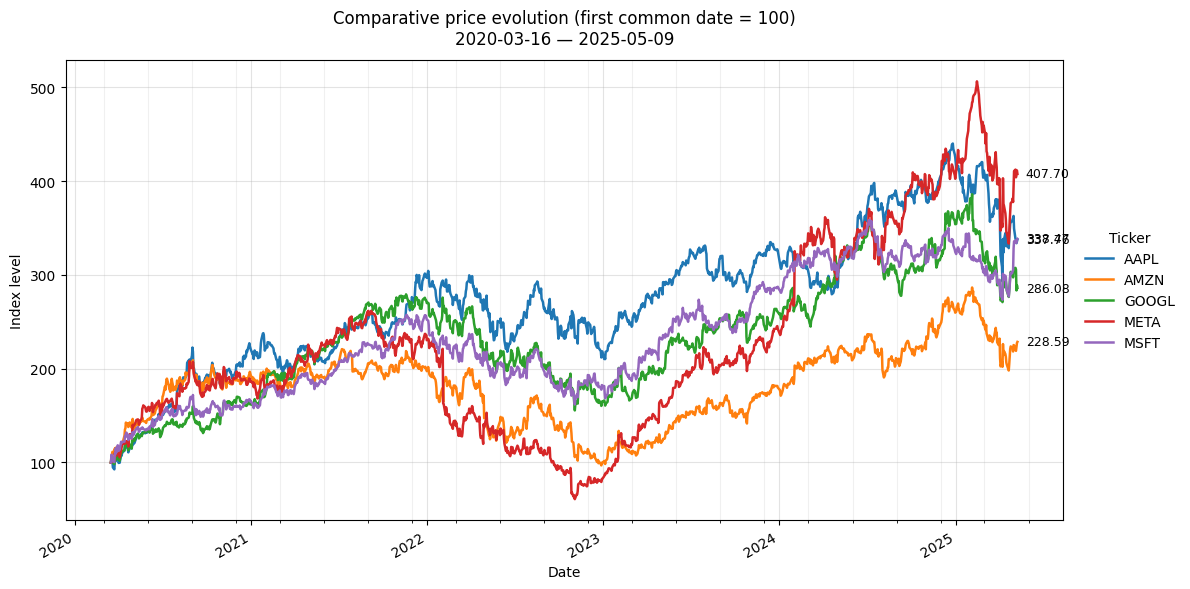

In [16]:
start_date = "2020-03-14"
end_date = "2025-05-10"
plot_prices(panel[['date','ticker','price']],
            start_date=start_date,
            end_date=end_date)

Now we move on to plot the log-returns of out series of prices. Those are computed as usual:
$$
r_t = log(P_{t+1}/P_t)
$$
and are one of the most important financial variables, being the fundamental variables of almost every financial theory out there: Black-Scholes, Vasicek, etc.

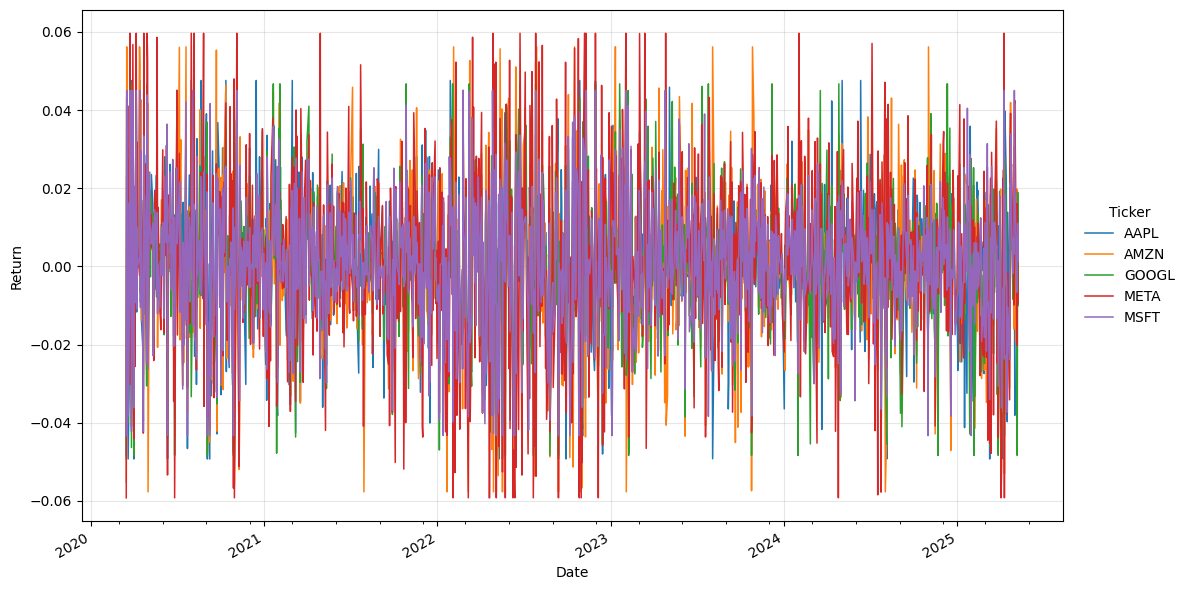

In [17]:
plot_returns(panel[['date','ticker','return']], 
             kind="line",
             rolling_vol_window=False,
             start_date=start_date, 
             end_date=end_date)

We can also take a look to the histogram of these returns. We expect it to be Gaussian-shaped, as the academy usually assumes. We can also expect it to have a heavier left tail than the right one, since it is one of the stylized facts of the financial series

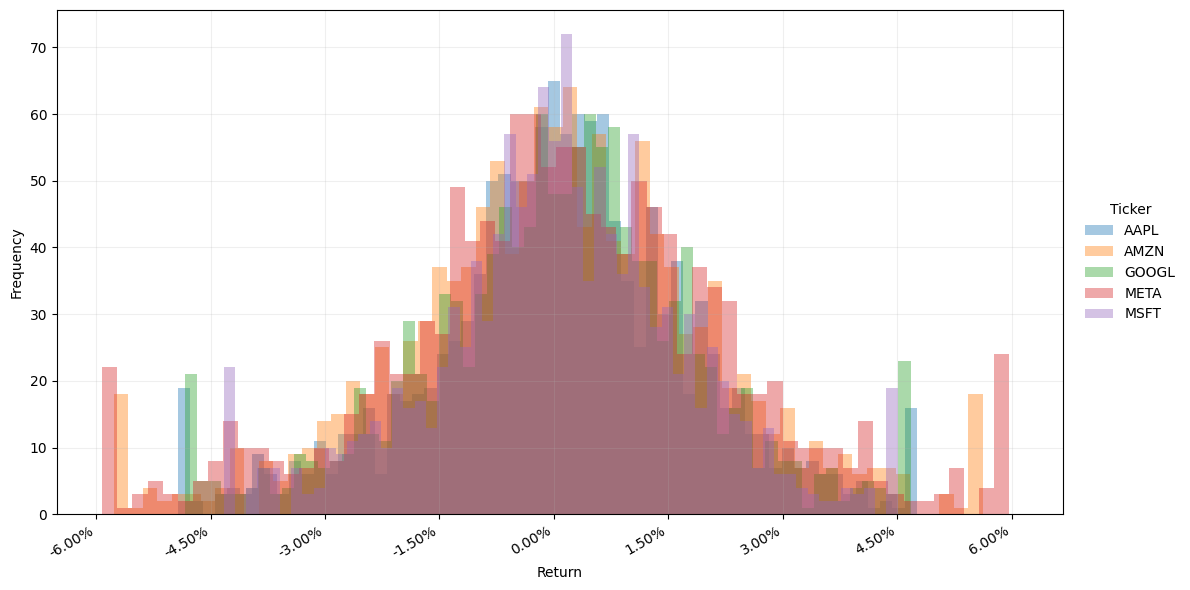

In [18]:
plot_returns(panel[['date','ticker','return']], 
             kind="hist",
             rolling_vol_window=False,
             start_date=start_date, 
             end_date=end_date)

Some additional graphics...

c:\Users\guilb\Desktop\github_portfolio\utils.py:613: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  mret = rets.resample("M").apply(lambda x: (1 + x).prod() - 1)


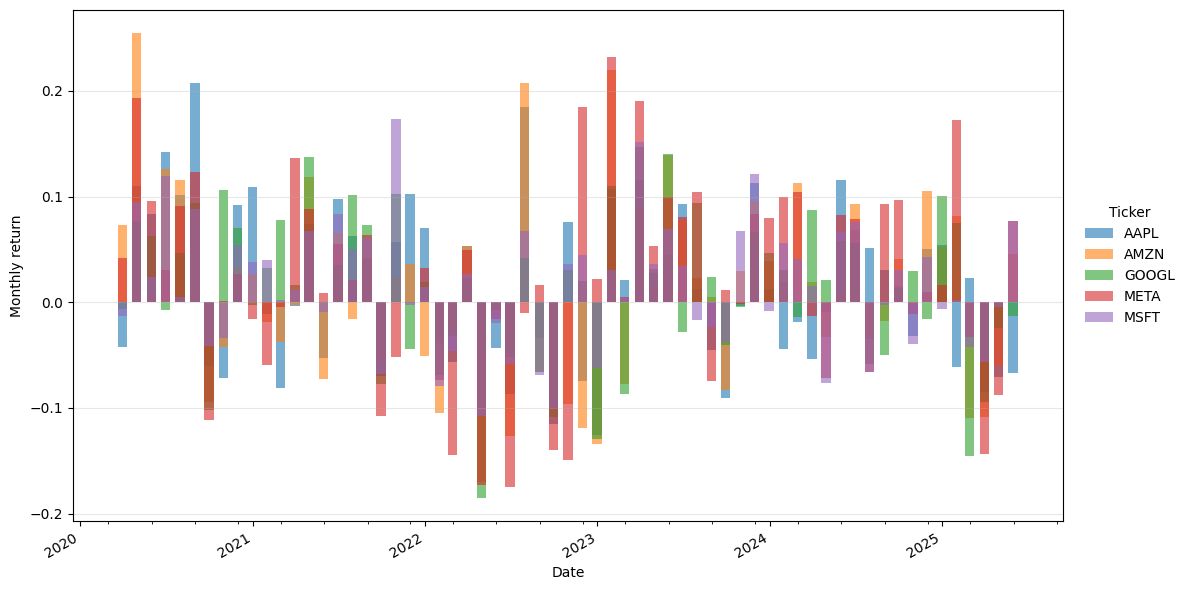

In [19]:
plot_returns(panel[['date','ticker','return']], 
             kind="bar",
             rolling_vol_window=False,
             start_date=start_date, 
             end_date=end_date)

Finally, we demonstrate the power of the generate_financial_commentary function, which provides an easy and quick way to analyse data and draw conclusions in the preliminary exploratory analysis.

In [20]:
print(auto_comment)

Analysis of the daily returns for the assets in relation to S&P 500:
- The assets show an average beta of 1.06 and an average correlation of 0.67 with S&P 500, indicating moderate market comovement.
- The average annualized return across assets is 21.80%, with an average annualized volatility of 27.22%.
- The average Sharpe ratio is 0.73, suggesting modest risk-adjusted performance.
- The return distribution shows slight left-tail bias on average and fat tails (avg. excess kurtosis = 1.18), implying a departure from normality and potential tail risk.
- At 95% confidence, the average historical VaR is 2.85% and the Conditional VaR is 4.00%, highlighting the scale of potential losses under adverse conditions.
- Overall, the assets exhibit characteristics typical of equities: high volatility relative to mean returns, significant market sensitivity, and non-negligible tail risk.


## 1.2. Fitting time series

In [25]:
# Fit all four models for a single ticker
res_META = fit_models_from_panel(panel, ticker="META")
display(res_META["comparison"])    # BIC ranking (lower is better)
res_META


,model,aic,bic,loglik
0,t,-15904.318352,-15886.133891,7955.159176
1,normal,-15748.319842,-15736.196869,7876.159921
2,garch_t,12962.435941,12992.743375,-6476.217971
3,garch_normal,13074.484467,13098.730414,-6533.242233


{'normal': {'model': 'normal',
  'mu': 0.0009968785612193846,
  'sigma': 0.02017055183292864,
  'loglik': 7876.159921239944,
  'aic': -15748.319842479888,
  'bic': -15736.196868746145},
 't': {'model': 't',
  'nu': 5.058183878307066,
  'mu': 0.0012265163359941474,
  'sigma': 0.015947130310539598,
  'loglik': 7955.159175766137,
  'aic': -15904.318351532274,
  'bic': -15886.13389093166},
 'garch_normal': {'model': 'garch(1,1)-normal',
  'mu': 0.0011951843465595237,
  'omega': 0.040949585553961325,
  'alpha1': 0.04893036663354389,
  'beta1': 0.9411945408863256,
  'loglik': -6533.242233386965,
  'aic': 13074.48446677393,
  'bic': 13098.730414241416,
  'n_obs': 3170,
  'converged': True,
  'uncond_var': 4.146754639144411},
 'garch_t': {'model': 'garch(1,1)-t',
  'mu': 0.001407048023637736,
  'omega': 0.01938006668403931,
  'alpha1': 0.06041128976325477,
  'beta1': 0.9384627308641272,
  'nu': 6.4329925820661105,
  'loglik': -6476.217970531219,
  'aic': 12962.435941062438,
  'bic': 12992.7433

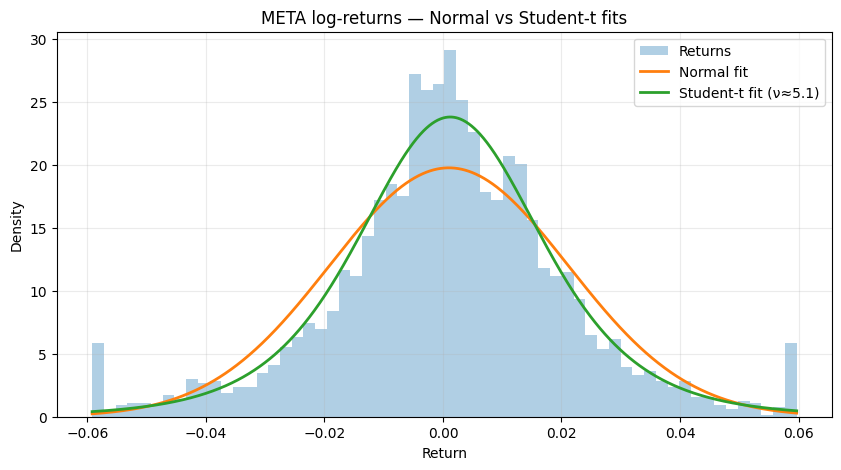

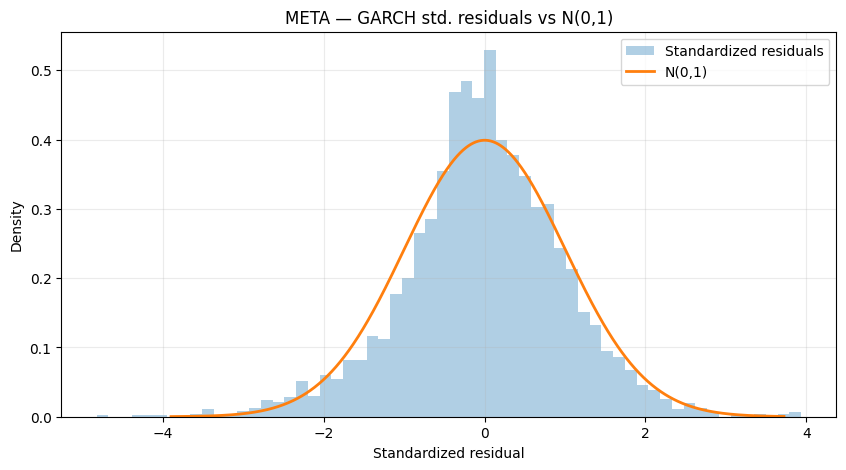

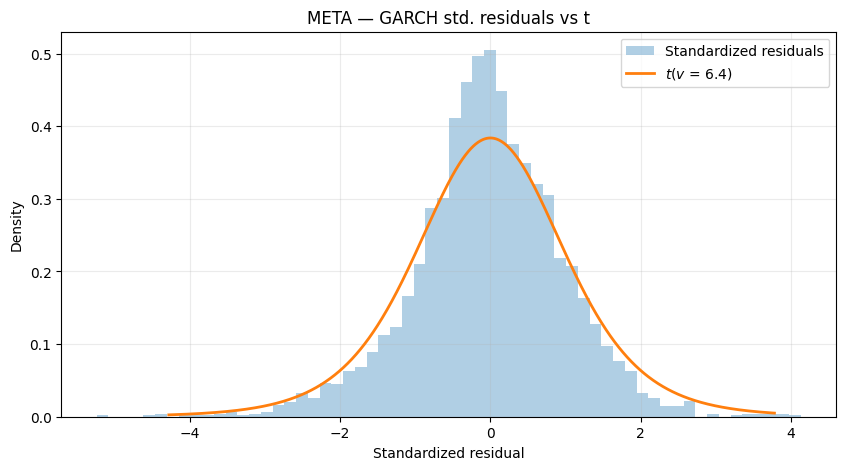

In [26]:
# Take panel from download_analyze_with_metrics
ser = (panel.loc[panel["ticker"]=="META"]
             .sort_values("date")["return"]
             .astype(float).dropna())

# Normal vs Student-t overlaid on histogram of returns (i.i.d. view)
plot_hist_with_pdf_normal_t(
    returns=ser,
    fit_normal_dict=res_META["normal"],
    fit_t_dict=res_META["t"],
    bins=60,
    title="META log-returns — Normal vs Student-t fits"
)

# GARCH standardized residuals vs assumed innovations
plot_hist_stdres_garch(
    returns=ser,
    dist="normal",
    title="META — GARCH std. residuals vs N(0,1)"
)

plot_hist_stdres_garch(
    returns=ser,
    dist="t",
    title="META — GARCH std. residuals vs t"
)


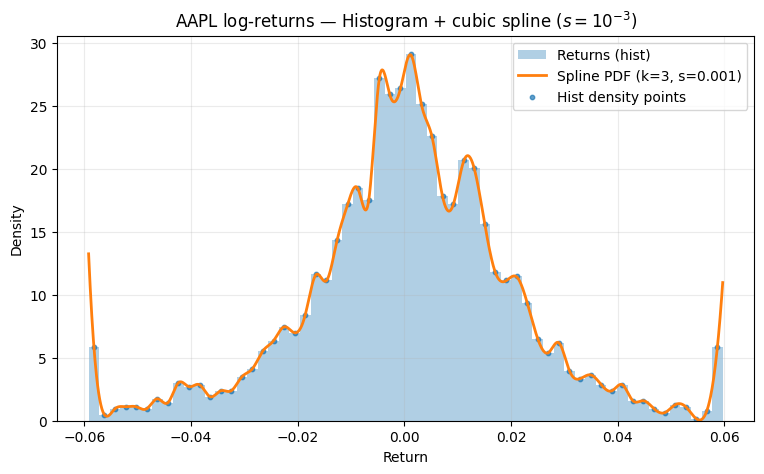

In [27]:
# Spline
plot_hist_with_spline(ser, bins=60, k=3, s=1e-3,
                      title=r"AAPL log-returns — Histogram + cubic spline ($s=10^{-3}$)")


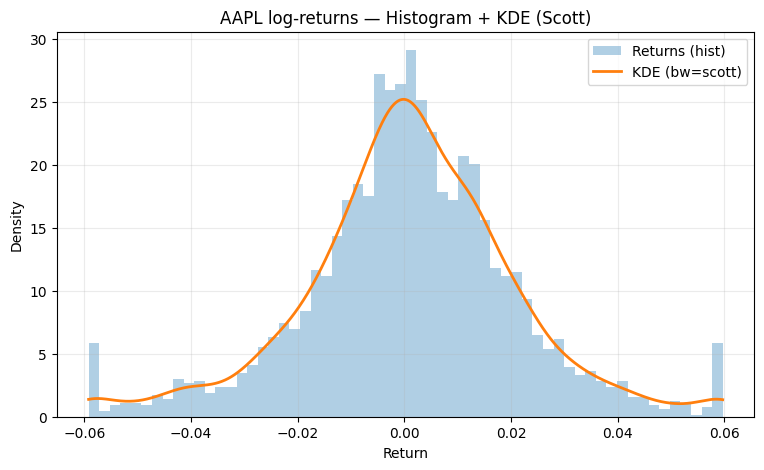

In [28]:
plot_hist_with_kde(ser, bins=60, bw_method="scott",
                   title="AAPL log-returns — Histogram + KDE (Scott)")